# Laws Textures test

In [1]:
from feature_maps import laws_textures
import cv2, matplotlib.pyplot as plt, os, numpy as np

LABELS_DIR = "dtd/labels"
IMGS_DIR = "dtd/images"

def load_labels():
    out = {}
    with open(os.path.join(LABELS_DIR,"labels_joint_anno.txt"), "r") as f:
        line = f.readline()[:-1]
        while line:
            line         = line.split(" ")
            name, labels = line[0], line[1:]
            out[name]    = labels
            line         = f.readline()[:-1]
    return out

def load_set(labels, set_name = "train", N = 1000000):
    out = {}
    i = 0
    for s in [r for r in os.listdir(LABELS_DIR) if r.startswith("train")]:
        with open(os.path.join(LABELS_DIR,s), "r") as f:
            line = f.readline()[:-1]
            while line:
                img = cv2.imread(os.path.join(IMGS_DIR,line), cv2.IMREAD_GRAYSCALE)
                out[line] = {}
                out[line]["image"] = img
                out[line]["label"] = labels[line]
                line = f.readline()[:-1]
        i += 1
        if i >= N:
            break
    return out

## Load datasets

In [2]:
labes = load_labels()
trainset = load_set(labes, "train", N = 1)
len(trainset)

1880

## Plot textures

In [3]:
laws = laws_textures(vector_dims = 5)

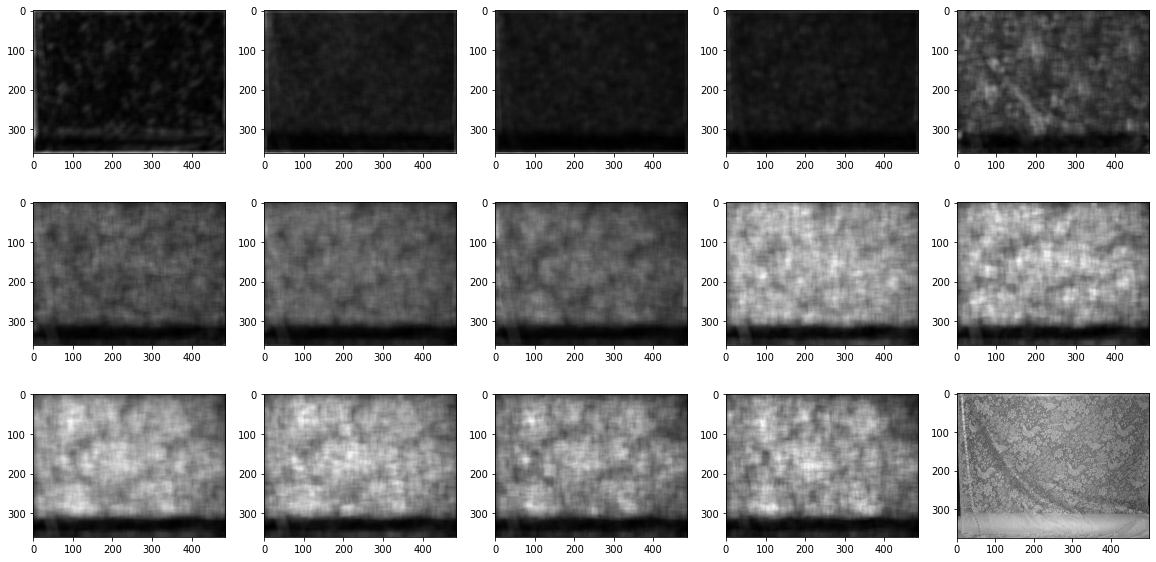

(361, 486, 14)

In [4]:
# np.random.seed(0)
random_img = np.random.choice(list(trainset.keys()))

img = trainset[random_img]["image"]
maps = laws.get_features(img, preprocess = True, merge_symmetric = True, compute_energy = True)

rows = 5
cols = 3
fig, axs = plt.subplots(cols, rows, figsize=(20, 10))

for i in range(cols):
    for j in range(rows):
        index = i*rows+j
        if index == 14:
            axs[i,j].imshow(img, cmap = "gray")
        else:
            axs[i,j].imshow(maps[...,index], cmap = "gray")
plt.show()
maps.shape

## Generate features

In [5]:
%%time
import tqdm

keys = list(trainset.keys())
for i in tqdm.tqdm(range(100)):
    img_name = keys[i]
    trainset[img_name]["laws"] = laws.get_features(trainset[img_name]["image"])

100%|██████████| 100/100 [01:04<00:00,  1.54it/s]

CPU times: user 1min 1s, sys: 3.01 s, total: 1min 4s
Wall time: 1min 4s


In [5]:
%%time
import tqdm

keys = list(trainset.keys())
for i in tqdm.tqdm(range(100)):
    img_name = keys[i]
    trainset[img_name]["laws"] = laws.get_features(trainset[img_name]["image"], compute_fully = True)

100%|██████████| 100/100 [00:59<00:00,  1.67it/s]

CPU times: user 56.1 s, sys: 2.86 s, total: 58.9 s
Wall time: 59.8 s


In [6]:
X = []
Y = []
for img in trainset:
    if "laws" in trainset[img]:
        for a in range(trainset[img]["laws"].shape[0]):
            for b in range(trainset[img]["laws"].shape[1]):
                X.append(trainset[img]["laws"][a,b,:])
                Y.append(trainset[img]["label"][0])

In [35]:
X = np.array(X)
Y = np.array(Y)
print(len(X), len(Y))

i = list(range(len(X)))
np.random.shuffle(i)
# i = i[:500]
X_small, Y_small = X[i], Y[i]
print(len(X_small), len(Y_small))

21107787 21107787
21107787 21107787


In [22]:
from sklearn.decomposition import PCA

transformer = PCA(n_components = 2)
transformer.fit(X_small)

PCA(n_components=2)

In [36]:
X_2d = transformer.transform(X_small)

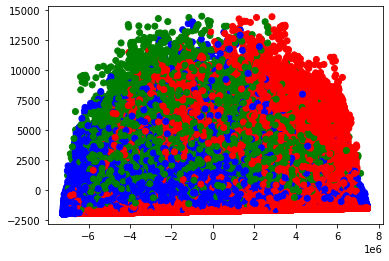

In [38]:
N = 1000000
def get_colors(Y):
    colors = ["red", "green", "blue", "purple", "orange", "pink", "yellow", "black", "lime", "brown"]
    out = []
    mapping = {}
    for y in Y:
        if y not in mapping:
            mapping[y] = colors.pop(0)
        out.append(mapping[y])
    return out
colors = get_colors(Y_small[:N])

plt.scatter(X_2d[:N,0], X_2d[:N,1], c = colors)
plt.show()